In [15]:
import numpy as np
import pandas as pd
import heapq
from pandasql import sqldf
transactions = pd.read_csv("data/transactions_train.csv")
sell_products_summary = transactions['article_id'].value_counts()
print(sell_products_summary)

706016001    50287
706016002    35043
372860001    31718
610776002    30199
759871002    26329
             ...  
254457030        1
581293001        1
868812001        1
867569001        1
551124007        1
Name: article_id, Length: 104547, dtype: int64


In [16]:
sell_products_summary = sell_products_summary.reset_index()
sell_products_summary = sell_products_summary.rename(columns = {"index": "article_id", "article_id":"sell_num"})
print(sell_products_summary)

        article_id  sell_num
0        706016001     50287
1        706016002     35043
2        372860001     31718
3        610776002     30199
4        759871002     26329
...            ...       ...
104542   254457030         1
104543   581293001         1
104544   868812001         1
104545   867569001         1
104546   551124007         1

[104547 rows x 2 columns]


In [17]:
sell_products_summary['sell_num'].describe()

count    104547.000000
mean        304.057735
std         791.266060
min           1.000000
25%          14.000000
50%          65.000000
75%         286.000000
max       50287.000000
Name: sell_num, dtype: float64

In [18]:
sell_products_summary['sell_num'].quantile([0.90,0.95,0.99,0.999])

0.900     793.000
0.950    1318.000
0.990    3185.080
0.999    9282.534
Name: sell_num, dtype: float64

In [19]:
# select the top-100 selled products
top_100_prod = sell_products_summary.iloc[0:100, :]
print(top_100_prod)

    article_id  sell_num
0    706016001     50287
1    706016002     35043
2    372860001     31718
3    610776002     30199
4    759871002     26329
..         ...       ...
95   753737001      9723
96   762846001      9663
97   685813001      9579
98   716672001      9394
99   599580055      9387

[100 rows x 2 columns]


In [20]:
articles = pd.read_csv("data/articles.csv")
print(articles.head(5))

   article_id  product_code          prod_name  product_type_no  \
0   108775015        108775          Strap top              253   
1   108775044        108775          Strap top              253   
2   108775051        108775      Strap top (1)              253   
3   110065001        110065  OP T-shirt (Idro)              306   
4   110065002        110065  OP T-shirt (Idro)              306   

  product_type_name  product_group_name  graphical_appearance_no  \
0          Vest top  Garment Upper body                  1010016   
1          Vest top  Garment Upper body                  1010016   
2          Vest top  Garment Upper body                  1010017   
3               Bra           Underwear                  1010016   
4               Bra           Underwear                  1010016   

  graphical_appearance_name  colour_group_code colour_group_name  ...  \
0                     Solid                  9             Black  ...   
1                     Solid               

In [21]:
top_100_details = sqldf("""SELECT *
        FROM top_100_prod as t
        INNER JOIN articles as a
        on t.article_id = a.article_id
    """)
print(top_100_details.head(5))

   article_id  sell_num  article_id  product_code                 prod_name  \
0   706016001     50287   706016001        706016  Jade HW Skinny Denim TRS   
1   706016002     35043   706016002        706016  Jade HW Skinny Denim TRS   
2   372860001     31718   372860001        372860        7p Basic Shaftless   
3   610776002     30199   610776002        610776                 Tilly (1)   
4   759871002     26329   759871002        759871                Tilda tank   

   product_type_no product_type_name  product_group_name  \
0              272          Trousers  Garment Lower body   
1              272          Trousers  Garment Lower body   
2              302             Socks      Socks & Tights   
3              255           T-shirt  Garment Upper body   
4              253          Vest top  Garment Upper body   

   graphical_appearance_no graphical_appearance_name  ...    department_name  \
0                  1010016                     Solid  ...           Trousers   
1   

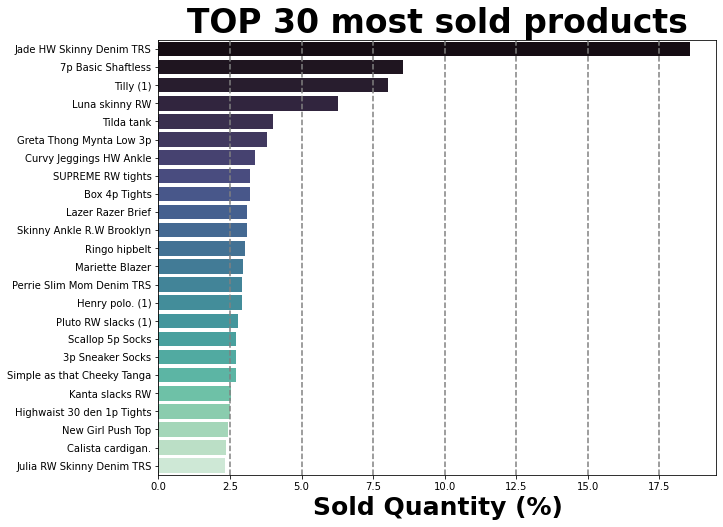

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.title("TOP 30 most sold products", fontsize=33, fontweight="bold")
no=30
g = sns.barplot(y="prod_name", x="sold_qty(%)", data=top_100_details.iloc[:no].groupby("prod_name")["sell_num"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False), \
            palette="mako", ci=False)
plt.xlabel("Sold Quantity (%)", size=25, fontweight="bold")
plt.ylabel("")
plt.grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)
plt.show()

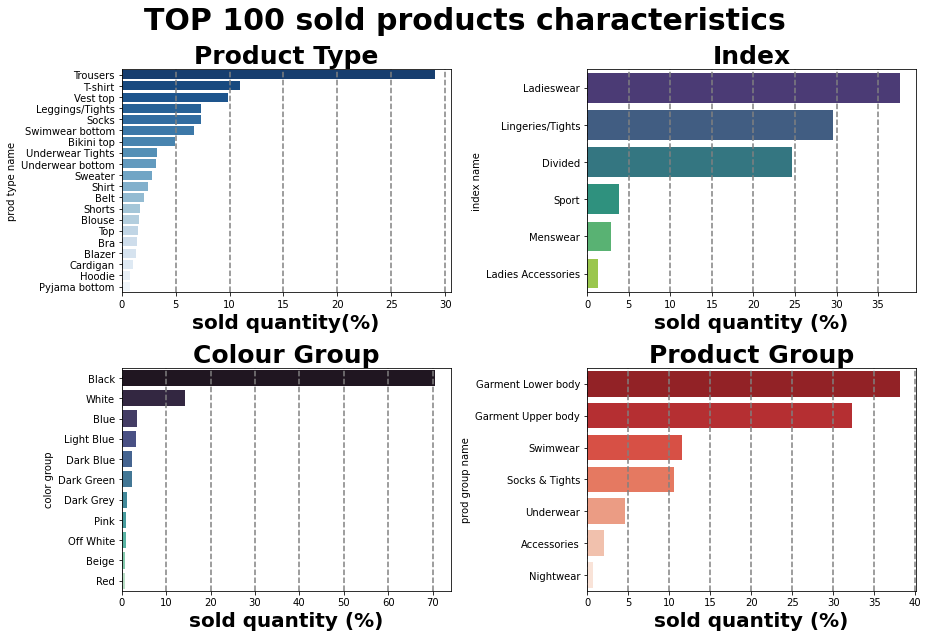

In [23]:
fig, ax = plt.subplots(2,2, figsize=(13,9))
plt.suptitle("TOP 100 sold products characteristics", fontweight="bold", fontsize=30)

no=100

g = sns.barplot(y="product_type_name", x="sold_qty(%)", data=top_100_details.iloc[:no].groupby("product_type_name")["sell_num"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False), \
            ax=ax[0,0],palette="Blues_r", ci=False)

ax[0,0].set_ylabel("prod type name")
ax[0,0].set_xlabel("sold quantity(%)", size=20,fontweight="bold")
ax[0,0].set_title("Product Type", size=25,fontweight="bold")
ax[0,0].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)


g = sns.barplot(y="index_name", x="sold_qty(%)", data=top_100_details.iloc[:no].groupby("index_name")["sell_num"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False), \
            ax=ax[0,1],palette="viridis", ci=False)
ax[0,1].set_ylabel("index name")
ax[0,1].set_xlabel("sold quantity (%)", size=20,fontweight="bold")
ax[0,1].set_title("Index", size=25,fontweight="bold")
ax[0,1].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)


g = sns.barplot(y="colour_group_name", x="sold_qty(%)", data=top_100_details.iloc[:no].groupby("colour_group_name")["sell_num"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False), \
            ax=ax[1,0],palette="mako", ci=False)
ax[1,0].set_ylabel("color group")
ax[1,0].set_xlabel("sold quantity (%)", size=20,fontweight="bold")
ax[1,0].set_title("Colour Group", size=25,fontweight="bold")
ax[1,0].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)

g = sns.barplot(y="product_group_name", x="sold_qty(%)", data=top_100_details.iloc[:no].groupby("product_group_name")["sell_num"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False), \
            ax=ax[1,1],palette="Reds_r", ci=False)
ax[1,1].set_ylabel("prod group name")
ax[1,1].set_xlabel("sold quantity (%)", size=20,fontweight="bold")
ax[1,1].set_title("Product Group", size=25,fontweight="bold")
ax[1,1].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)
fig.tight_layout()

plt.show() 


In [24]:
sell_only_once = sell_products_summary["sell_num"].where(lambda x: x==1).dropna()
sell_only_once = sell_only_once.reset_index()
sell_only_once = sell_only_once.rename(columns = {"index": "article_id"})
print(sell_only_once)

      article_id  sell_num
0         100056       1.0
1         100057       1.0
2         100058       1.0
3         100059       1.0
4         100060       1.0
...          ...       ...
4486      104542       1.0
4487      104543       1.0
4488      104544       1.0
4489      104545       1.0
4490      104546       1.0

[4491 rows x 2 columns]


In [25]:
sell_only_once = sell_products_summary.tail(4491)
# print(sell_only_once)
sell_once_details = sqldf("""SELECT *
        FROM sell_only_once as o
        INNER JOIN articles as a
        on o.article_id = a.article_id
    """)
print(sell_once_details.head(5))

   article_id  sell_num  article_id  product_code           prod_name  \
0   705543005         1   705543005        705543       Pria PLUSSIZE   
1   483597003         1   483597003        483597        Bilbuk wedge   
2   580067001         1   580067001        580067  Axel gusset jogger   
3   588119001         1   588119001        588119    Jaguar cross bag   
4   712052005         1   712052005        712052        Echo Sneaker   

   product_type_no product_type_name  product_group_name  \
0              255           T-shirt  Garment Upper body   
1               95             Wedge               Shoes   
2              272          Trousers  Garment Lower body   
3               66               Bag         Accessories   
4               94          Sneakers               Shoes   

   graphical_appearance_no graphical_appearance_name  ...  \
0                  1010008               Front print  ...   
1                  1010016                     Solid  ...   
2                

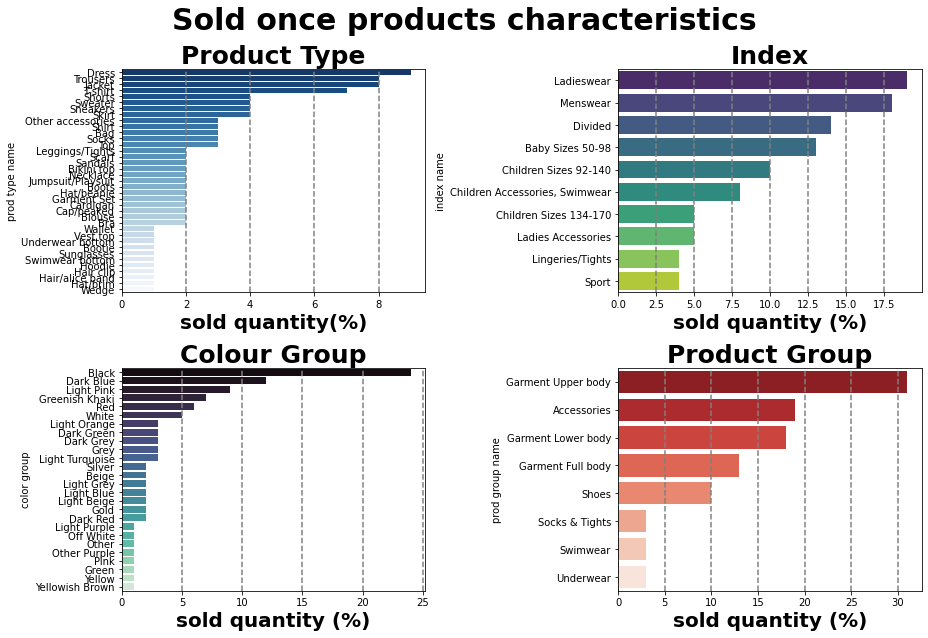

In [26]:
fig, ax = plt.subplots(2,2, figsize=(13,9))
plt.suptitle("Sold once products characteristics", fontweight="bold", fontsize=30)

no=100

g = sns.barplot(y="product_type_name", x="sold_qty(%)", data=sell_once_details.iloc[:no].groupby("product_type_name")["sell_num"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False), \
            ax=ax[0,0],palette="Blues_r", ci=False)

ax[0,0].set_ylabel("prod type name")
ax[0,0].set_xlabel("sold quantity(%)", size=20,fontweight="bold")
ax[0,0].set_title("Product Type", size=25,fontweight="bold")
ax[0,0].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)


g = sns.barplot(y="index_name", x="sold_qty(%)", data=sell_once_details.iloc[:no].groupby("index_name")["sell_num"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False), \
            ax=ax[0,1],palette="viridis", ci=False)
ax[0,1].set_ylabel("index name")
ax[0,1].set_xlabel("sold quantity (%)", size=20,fontweight="bold")
ax[0,1].set_title("Index", size=25,fontweight="bold")
ax[0,1].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)


g = sns.barplot(y="colour_group_name", x="sold_qty(%)", data=sell_once_details.iloc[:no].groupby("colour_group_name")["sell_num"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False), \
            ax=ax[1,0],palette="mako", ci=False)
ax[1,0].set_ylabel("color group")
ax[1,0].set_xlabel("sold quantity (%)", size=20,fontweight="bold")
ax[1,0].set_title("Colour Group", size=25,fontweight="bold")
ax[1,0].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)

g = sns.barplot(y="product_group_name", x="sold_qty(%)", data=sell_once_details.iloc[:no].groupby("product_group_name")["sell_num"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('sold_qty(%)').reset_index().sort_values(by="sold_qty(%)", ascending=False), \
            ax=ax[1,1],palette="Reds_r", ci=False)
ax[1,1].set_ylabel("prod group name")
ax[1,1].set_xlabel("sold quantity (%)", size=20,fontweight="bold")
ax[1,1].set_title("Product Group", size=25,fontweight="bold")
ax[1,1].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)
fig.tight_layout()

plt.show() 


In [27]:
df_price = transactions[["price","article_id"]].groupby("article_id").sum().sort_values(by="price", ascending=False)
print(df_price)

                  price
article_id             
706016001   1631.732102
706016002   1136.321085
568601006    939.268593
448509014    781.478390
706016003    692.195915
...                 ...
407663007      0.000678
520431003      0.000678
405310006      0.000475
569052001      0.000441
344625009      0.000424

[104547 rows x 1 columns]


In [28]:
df_price.rename(columns={"price":"earning"}, inplace=True)
print(df_price)

                earning
article_id             
706016001   1631.732102
706016002   1136.321085
568601006    939.268593
448509014    781.478390
706016003    692.195915
...                 ...
407663007      0.000678
520431003      0.000678
405310006      0.000475
569052001      0.000441
344625009      0.000424

[104547 rows x 1 columns]


In [29]:
df_price = df_price.reset_index()
print(df_price)

        article_id      earning
0        706016001  1631.732102
1        706016002  1136.321085
2        568601006   939.268593
3        448509014   781.478390
4        706016003   692.195915
...            ...          ...
104542   407663007     0.000678
104543   520431003     0.000678
104544   405310006     0.000475
104545   569052001     0.000441
104546   344625009     0.000424

[104547 rows x 2 columns]


In [30]:
print("Top 100 profitable products accounts for ", df_price.iloc[:100]["earning"].sum() / df_price.iloc[:]["earning"].sum() * 100, "% of the total earnings")

Top 100 profitable products accounts for  4.361750793927205 % of the total earnings


In [31]:
top_100_earnings = df_price[:100]
print(top_100_earnings)

    article_id      earning
0    706016001  1631.732102
1    706016002  1136.321085
2    568601006   939.268593
3    448509014   781.478390
4    706016003   692.195915
..         ...          ...
95   573937001   258.028559
96   507910001   257.567610
97   554479001   257.367458
98   399223033   256.897508
99   712587003   254.811407

[100 rows x 2 columns]


In [32]:
top_100_earnings_details = sqldf("""SELECT *
        FROM top_100_earnings as t
        INNER JOIN articles as a
        on t.article_id = a.article_id""")
print(top_100_earnings_details.head(5))

   article_id      earning  article_id  product_code  \
0   706016001  1631.732102   706016001        706016   
1   706016002  1136.321085   706016002        706016   
2   568601006   939.268593   568601006        568601   
3   448509014   781.478390   448509014        448509   
4   706016003   692.195915   706016003        706016   

                   prod_name  product_type_no product_type_name  \
0   Jade HW Skinny Denim TRS              272          Trousers   
1   Jade HW Skinny Denim TRS              272          Trousers   
2            Mariette Blazer              264            Blazer   
3  Perrie Slim Mom Denim TRS              272          Trousers   
4   Jade HW Skinny Denim TRS              272          Trousers   

   product_group_name  graphical_appearance_no graphical_appearance_name  ...  \
0  Garment Lower body                  1010016                     Solid  ...   
1  Garment Lower body                  1010016                     Solid  ...   
2  Garment Upper 

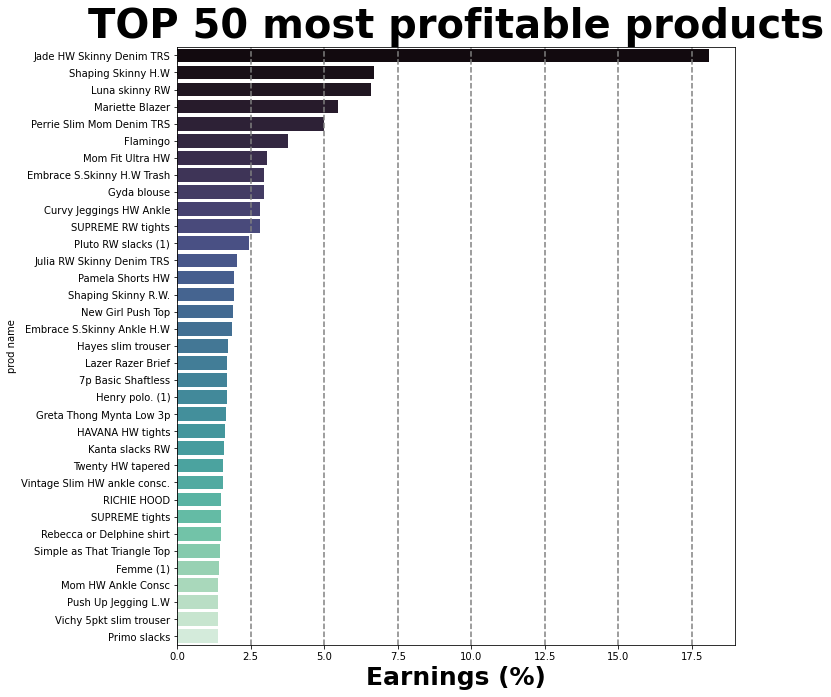

In [33]:
plt.figure(figsize=(10,11))
plt.title("TOP 50 most profitable products", size=40, fontweight="bold")
no=50
g = sns.barplot(y="prod_name", x="earning(%)", data=top_100_earnings_details.iloc[:no].groupby("prod_name")["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False), \
            palette="mako", ci=False)

plt.xlabel("Earnings (%)", size=25, fontweight="bold")
plt.ylabel("prod name")
plt.grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)
plt.show()

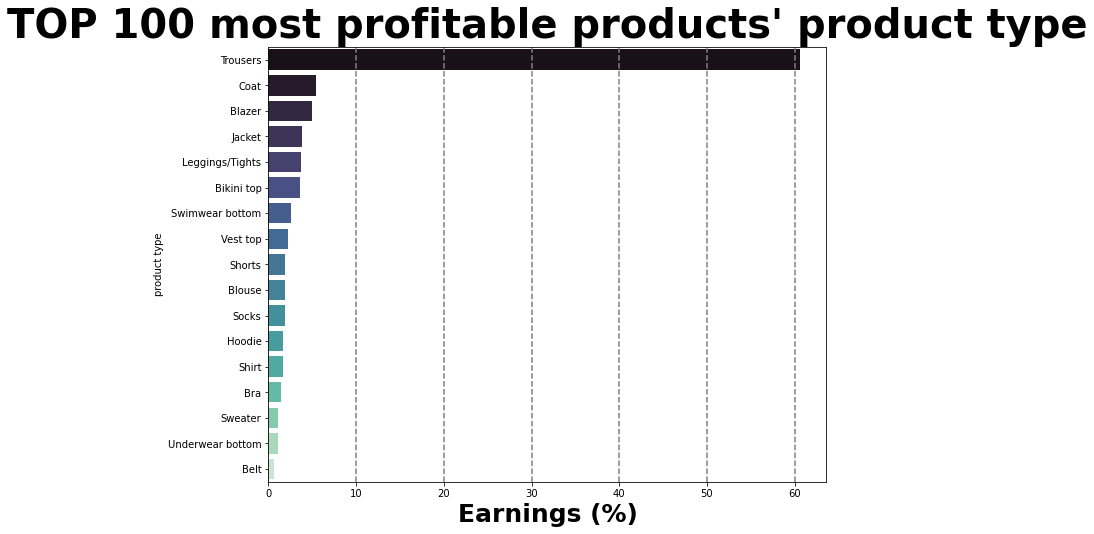

In [28]:
plt.figure(figsize=(10,8))
plt.title("TOP 100 most profitable products' product type", size=40, fontweight="bold")
no=100
g = sns.barplot(y="product_type_name", x="earning(%)", data=top_100_earnings_details.iloc[:no].groupby("product_type_name")["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False), \
            palette="mako", ci=False)
plt.xlabel("Earnings (%)", size=25, fontweight="bold")
plt.ylabel("product type")
plt.grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)
plt.show()

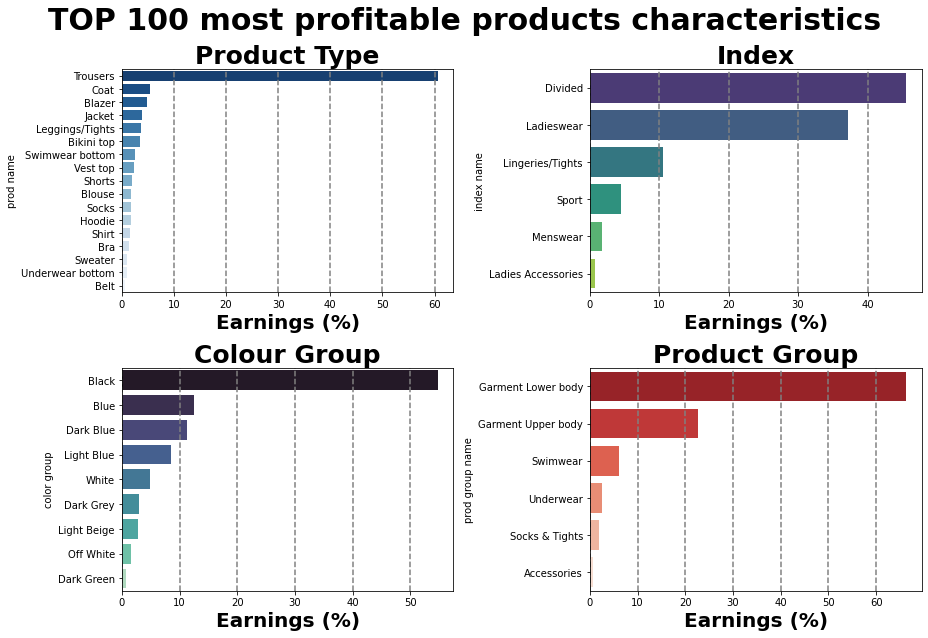

In [29]:
fig, ax = plt.subplots(2,2, figsize=(13,9))
plt.suptitle("TOP 100 most profitable products characteristics", fontweight="bold", fontsize=30)

no=100

g = sns.barplot(y="product_type_name", x="earning(%)", data=top_100_earnings_details.iloc[:no].groupby("product_type_name")["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False), \
            ax=ax[0,0],palette="Blues_r", ci=False)

ax[0,0].set_ylabel("prod name")
ax[0,0].set_xlabel("Earnings (%)", size=20,fontweight="bold")
ax[0,0].set_title("Product Type", size=25,fontweight="bold")
ax[0,0].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)


g = sns.barplot(y="index_name", x="earning(%)", data=top_100_earnings_details.iloc[:no].groupby("index_name")["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False), \
            ax=ax[0,1],palette="viridis", ci=False)
ax[0,1].set_ylabel("index name")
ax[0,1].set_xlabel("Earnings (%)", size=20,fontweight="bold")
ax[0,1].set_title("Index", size=25,fontweight="bold")
ax[0,1].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)


g = sns.barplot(y="colour_group_name", x="earning(%)", data=top_100_earnings_details.iloc[:no].groupby("colour_group_name")["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False), \
            ax=ax[1,0],palette="mako", ci=False)
ax[1,0].set_ylabel("color group")
ax[1,0].set_xlabel("Earnings (%)", size=20,fontweight="bold")
ax[1,0].set_title("Colour Group", size=25,fontweight="bold")
ax[1,0].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)

g = sns.barplot(y="product_group_name", x="earning(%)", data=top_100_earnings_details.iloc[:no].groupby("product_group_name")["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False), \
            ax=ax[1,1],palette="Reds_r", ci=False)
ax[1,1].set_ylabel("prod group name")
ax[1,1].set_xlabel("Earnings (%)", size=20,fontweight="bold")
ax[1,1].set_title("Product Group", size=25,fontweight="bold")
ax[1,1].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)
fig.tight_layout()

plt.show() 


In [35]:
worst_100_products = df_price.tail(100).dropna()
print(worst_100_products)

        article_id   earning
104447   555293002  0.002136
104448   502262002  0.002119
104449   585716001  0.002034
104450   807241091  0.001864
104451   619730001  0.001695
...            ...       ...
104542   407663007  0.000678
104543   520431003  0.000678
104544   405310006  0.000475
104545   569052001  0.000441
104546   344625009  0.000424

[100 rows x 2 columns]


In [36]:
worst_100_details = sqldf("""SELECT *
        FROM worst_100_products as w
        INNER JOIN articles as a
        on w.article_id = a.article_id""")
print(worst_100_details.head(5))

   article_id   earning  article_id  product_code               prod_name  \
0   555293002  0.002136   555293002        555293  Elin thin hair elastic   
1   502262002  0.002119   502262002        502262           Kelly mittens   
2   585716001  0.002034   585716001        585716          Festival dress   
3   807241091  0.001864   807241091        807241            1p Fun Socks   
4   619730001  0.001695   619730001        619730             1 pk Stripe   

   product_type_no product_type_name product_group_name  \
0               73       Hair string        Accessories   
1               71            Gloves        Accessories   
2              265             Dress  Garment Full body   
3              302             Socks     Socks & Tights   
4              302             Socks     Socks & Tights   

   graphical_appearance_no graphical_appearance_name  ...  \
0                  1010016                     Solid  ...   
1                  1010010                   Melange  ...   

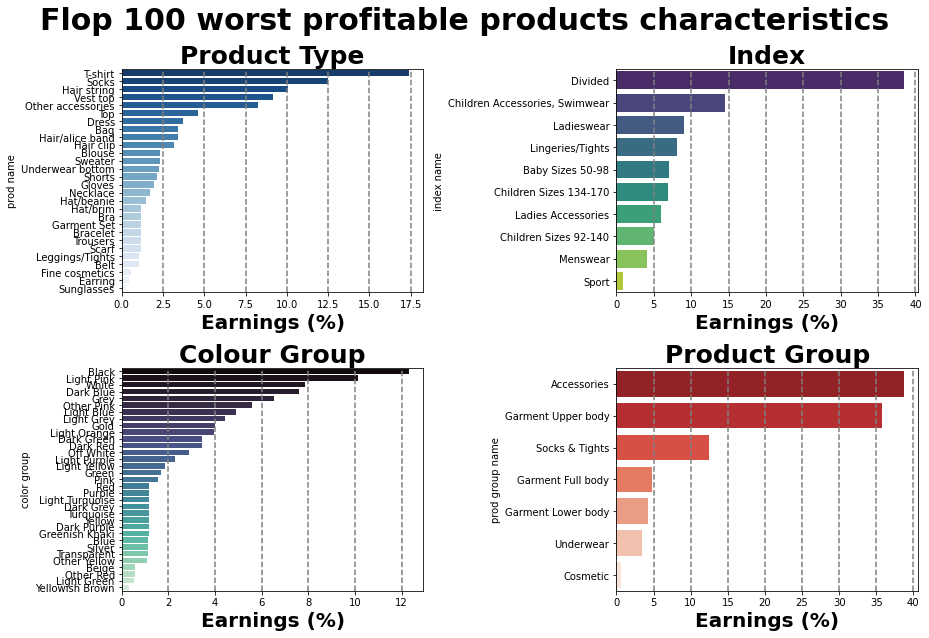

In [37]:
fig, ax = plt.subplots(2,2, figsize=(13,9))
plt.suptitle("Flop 100 worst profitable products characteristics", fontweight="bold", fontsize=30)

no=100

g = sns.barplot(y="product_type_name", x="earning(%)", data=worst_100_details.groupby("product_type_name")["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False), \
            ax=ax[0,0],palette="Blues_r", ci=False)

ax[0,0].set_ylabel("prod name")
ax[0,0].set_xlabel("Earnings (%)", size=20,fontweight="bold")
ax[0,0].set_title("Product Type", size=25,fontweight="bold")
ax[0,0].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)


g = sns.barplot(y="index_name", x="earning(%)", data=worst_100_details.groupby("index_name")["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False), \
            ax=ax[0,1],palette="viridis", ci=False)
ax[0,1].set_ylabel("index name")
ax[0,1].set_xlabel("Earnings (%)", size=20,fontweight="bold")
ax[0,1].set_title("Index", size=25,fontweight="bold")
ax[0,1].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)


g = sns.barplot(y="colour_group_name", x="earning(%)", data=worst_100_details.groupby("colour_group_name")["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False), \
            ax=ax[1,0],palette="mako", ci=False)
ax[1,0].set_ylabel("color group")
ax[1,0].set_xlabel("Earnings (%)", size=20,fontweight="bold")
ax[1,0].set_title("Colour Group", size=25,fontweight="bold")
ax[1,0].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)

g = sns.barplot(y="product_group_name", x="earning(%)", data=worst_100_details.groupby("product_group_name")["earning"].sum() \
            .transform(lambda x: (x / x.sum() * 100)).rename('earning(%)').reset_index().sort_values(by="earning(%)", ascending=False), \
            ax=ax[1,1],palette="Reds_r", ci=False)
ax[1,1].set_ylabel("prod group name")
ax[1,1].set_xlabel("Earnings (%)", size=20,fontweight="bold")
ax[1,1].set_title("Product Group", size=25,fontweight="bold")
ax[1,1].grid(axis="x",color = 'grey', linestyle = '--', linewidth = 1.5)
fig.tight_layout()

plt.show() 
